## Decision Trees

* It can do both classification and regression tasks and even multioutput tasks.

* Decision Trees are also the fundamental components of random forest.

Setup

In [45]:
import sys

assert sys.version_info >=(3,7)

In [46]:
from packaging import version

import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Defining default font size and make the figure prettier:

In [47]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes',labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

creating a decision_trees folder if it doesn't exist already, and defining the `save_fig()` which is used through this code to save the figures in high-res.

In [48]:
from pathlib import Path
IMAGES_PATH=Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path= IMAGES_PATH / f"{fig_id}.{fig_extension}"

  if tight_layout:
    plt.tight_layout()

  plt.savefig(path, format=fig_extension, dpi=resolution) #dot per inches

## Training and Visualizing a Decision Tree



In [49]:
from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier

iris= load_iris(as_frame=True)

X_iris= iris.data[["petal length (cm)","petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

Generating Decision Tree figure

In [50]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=str(IMAGES_PATH/ "iris_tree.dot"),
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

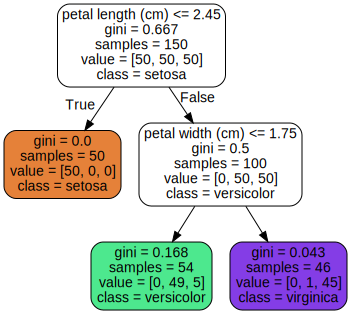

In [51]:
from graphviz import Source

Source.from_file(IMAGES_PATH/"iris_tree.dot")

In Above diagram:
1. Each box represent node
2. each row represents depth
3. <= is showing condition
4. samples showing current instances qualify to that node , root node shows total number of instances selected as a training data.
5. Value represent total number of classes and count of each class , in this example total classes are 3, and instances belongs to each classes [50,50,50]

6. `gini`: node attribute measures its *Gini impurity*: a node is pure ; `gini=0`, if all the training instances it applies to belong to the same class.

Example:
Below equation shows how the training algorithm computes the Gini impurity $G_i$ of the $i^{th}$ node. The depth-2 left node has a Gini impurity equal to:

 $1-\begin{pmatrix}\dfrac{0}{54}\end{pmatrix}^2-\begin{pmatrix}\dfrac{49}{54}\end{pmatrix}^2-\begin{pmatrix}\dfrac{5}{54}\end{pmatrix}^2 \approx 0.168$

 ## Gini impurity for $i^{th}$ node

 $G_i=1-\sum_{k=1}^n {p_{i,k}}^2$

* $p_{i,k}$ is the ratio of class k instances among the training instances in the $i^{th} \ $node.


Scikit-Learn uses the CART algorithm which produces only binary trees, means tree will have exactly 2 children.Other algorithms , such as ID3, can produce trees with nodes that have mode than 2 children.

To convert from .dot file to some other format using Graphviz

In [52]:
!dot -Tpng{IMAGES_PATH / "iris_tree.dot"} -o {IMAGES_PATH / "iris_tree.png"}

Format: "pngimages/decision_trees/iris_tree.dot" not recognized. Use one of: canon cmap cmapx cmapx_np dot dot_json eps fig gd gd2 gif gv imap imap_np ismap jpe jpeg jpg json json0 mp pdf pic plain plain-ext png pov ps ps2 svg svgz tk vdx vml vmlz vrml wbmp webp x11 xdot xdot1.2 xdot1.4 xdot_json xlib


Here the classification is based on its petals. so it will check if petal length <=2.45 (in root node) then it will go to left node (leaf node) (level 1) and result will be Setosa, else it will go to right and then again check if width is <=1.75 (level 1), if true then it will be versicolor (level 2) else it will be virginica (level 2)

One quality of Decision Trees is that they require very little data preparation.

* They don't require feature scalling or centering at all.

## Making predictions

setosa
versicolor
virginica
2.449999988079071 1.75 4.950000047683716 4.8500001430511475


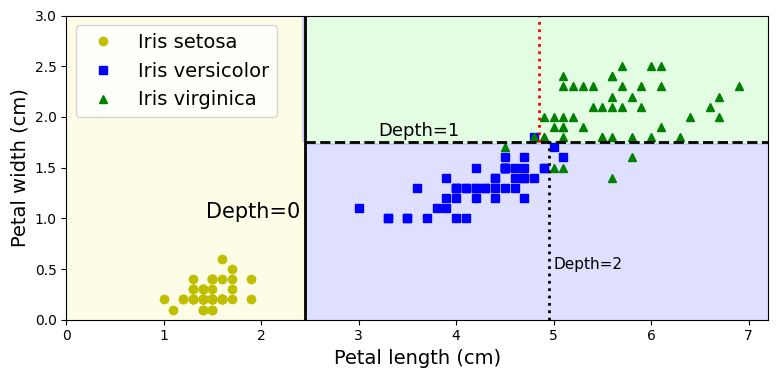

In [53]:
import numpy as np

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

custom_cmap=ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.figure(figsize=(8,4))

lengths, widths= np.meshgrid(np.linspace(0,7.2,100), np.linspace(0,3,100)) # lengths.shape= 100 X 100

X_iris_all= np.c_[lengths.ravel(), widths.ravel()] # 10000 X 2

y_pred= tree_clf.predict(X_iris_all).reshape(lengths.shape) # 100 X 100

plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names,("yo","bs","g^"))):
  print(name)
  plt.plot(X_iris[:,0][y_iris==idx], X_iris[:,1][y_iris==idx], style, label=f"Iris {name}")


tree_clf_deeper= DecisionTreeClassifier(max_depth=3, random_state=42)

tree_clf_deeper.fit(X_iris, y_iris)
'''
tree_.threshold attribute represents the threshold value used in the decision tree  for splitting nodes.

In below example indices provided [0.2.3.6] correspond to specific nodes in the tree.
This helps to access or manipulate these threshold values.
'''
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0,2,3,6]]
print(th0, th1, th2a, th2b )
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0,th0], [0,3], "k-", linewidth=2)
plt.plot([th0,7.2], [th1,th1], "k--", linewidth=2)
plt.plot([th2a,th2a], [0,th1], "k:", linewidth=2)
plt.plot([th2b,th2b], [th1,3], "r:", linewidth=2)

plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05,0.5, "Depth=2",  fontsize=11)
plt.axis([0,7.2,0,3])
plt.legend()
save_fig("decision_tree_decision_boundaries_plot")
plt.show()

Can access tree structure via the `tree_` attribute:

In [54]:
tree_clf.tree_

In [55]:
#help(sklearn.tree._tree.Tree)

## Estimating Class Probabilities:

it calculate probability against total instance and then it predicts based on highest probability value.

In [56]:
tree_clf.predict_proba([[5,1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [57]:
tree_clf.predict([[5, 1.5]])

array([1])

## The CART Training Algorithm (Classification And Regression Tree)

The algoritm works by first splitting the training set into two subsets using a single feature k and a threshold $t_k$ (e.g., "petal length <=2.45 cm").

How does it choose k and $t_k$?
- It searches for the pair (k, $t_k$) that produces the purest subsets, weighted by their size. below equation gives the cost function that the algorithm tries to minimize.

**CART cost function for classification**

$\mathbf{J}(k,t_k)= \dfrac{m_{left}}{m}G_{left} + \dfrac {m_{right}}{m}G_{right}$

where $\begin{matrix}
G_{\dfrac{left}{right}} measures \ the \ impurity \ of \  the \ left/right \ subset \\
m_{\dfrac {left}{right}} \ is \ the \ number \ of \ instances \ in \ the \ left/right \ subset
 \end{matrix}$



CART algoritm split the training set in two, it splits the subsets using the same logic , then the sub-subsets, and so on, recursively. It stops recusing oncec it reaches the maximum depth (defined by the `max_depth` hyperparameters), or if it cannot find the split that will reduce the impurity. Few other hyperparameters control additional stopping conditions:

`min_samples_split`,`min_samples_leaf`, `min_weight_fraction_leaf`, and `max_leaf_nodes`

* CART is *greedy algorithm* searches for an optimum split at the top level, then repeats the process at each subsequent level.

* CART doesn't check weather or not the split will lead to the lowest possible impurity several level down.

* Greedy algorithms often produces a solution that's reasonably good but not guaranteed to be optimal.

* finding the optimal tree is known to be an NP-Complete problem, it requires $O(exp(m)) times, this is why we must settle for a "reasonably good" solution when training decision trees.


## Computational Complexity

* Decision Trees generally are approximately balanced, so traversing (root to leaf) the decision tree requires going through roughly $O(log_2(m))$ nodes , where $log_2(m)$ is the binary logarithm of m, $m=\dfrac{log(m)}{log(2)}$, since each node only requires checking the value of one feature, the overall prediction complexity is $O(log_2(m))$, independent of the number of features, so preditions are very fast, wven when dealing with large training set.

The training algorithm compares all features (or less if `max_features is set`) on all samples at each node. Comparing all features all all samples at each node result in a training complexity of $O(n\times m \ log_2(m)$

## Gini Impurity or Entropy?

* By default the `DecisionTreeClassifier` class uses Gini impurity measure, but we can select the *entropy* impurity measure instead by setting the `criterion` hyperparameter to `"entropy"`.

* When molecules are still and well ordered , then entropy approaches to zero.

* Entropy is zero when all messages are identical.

* In ML entropy is frequently used as an impuritymeasure: a set's entropy is zero when it contains instances of only one class.

For exampple:

The depth-2 left node in above tree diagram has an entropy equal to -$(\dfrac{49}{54})\ log_2 (\dfrac{49}{54}) -(\dfrac{5}{54}) log_2 (\dfrac{5}{}54) ≈ 0.445$

**Entropy**

$H_i = \underset {p_i,k \not=0} {\sum_{k=1}^n}\  p_i, k \ log_2(p_i,k)$

Which one is better (Gini or entropy)?

* Gini impurity is slightly faster to compute so it is a good by default, However when they differe, Gini impurity tends to isolate the most frequent classes in its own branch of the tree, while entropy tends to produce slightly more balanced tree.


## Regularization Hyperparameters.

* Decision trees makes very few assumptions about the training data (unlike Linear models which assumes that the data is linear).

* When no constraints are applied in Decision tree , tree structure will adapt to the training data, fitting is very closely- most likely overfitting it. Such a model known as *non-parametric model*, because number of parameters is not determined prior to training, so the model structure is free to stick closely to the data.



* In *parametric model* such as in Linear model has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting , but increasing the risk of underfitting.

* To avoid overfitting the training data, need to restrict the decision tree's freedom during training, and this is known as regulariation.

* Regularization hyperparamets depends on the algorithm used, but generally we can at least restrict the maximum depth of the decision tree. In Scikit learn it is  `max_depth` hyperparameter. The default value is none means unlimited. Reducing `max_depth` will regularize the model and thus reduce the risk of overfitting.

The `DecisionTreeClassifier` has below parameters that similarly restrict the shape of the decision tree:

`max_features` : Maximum number of features that are evaluated for splitting at each node.

`max_leaf_nodes`: Maximum number of leaf nodes

`min_samples_split`: Minimum number of samples a node must have before it can be split

`min_samples_leaf`: Minimum number of samples a leaf node must have to be created.

`min_width_fraction_leaf`: Same as `min_samples_leaf` but expressed as a fraction of the total number of weighted instances.


Increasing `min_*` hyperparameters or reducing `max_*` hyperparameters will regularize the model


Other algorithms works by first training the decision tree without restrictions and then *pruning* (deleting ) unnecessary nodes. A node whose all children are leaf nodes is considered unnecessary, if the purity improvement it provides is not statistically significant. Standard Statistical tests, such as the Chi-Squared test are used to estimate the probability that the improvement is purely the result of chance (which is called the *null hypothesis*). If this probability , called the p-value, is higher than a given threshold (typically 5%, controlled by a hyperparameter), then the node is considered unnecesssary and its children are deleted. The pruning continues untill all unnecessary nodes have been pruned.

In [58]:
from sklearn.datasets import make_moons

X_moons, y_moons= make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1= DecisionTreeClassifier(random_state=42)
tree_clf2=DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

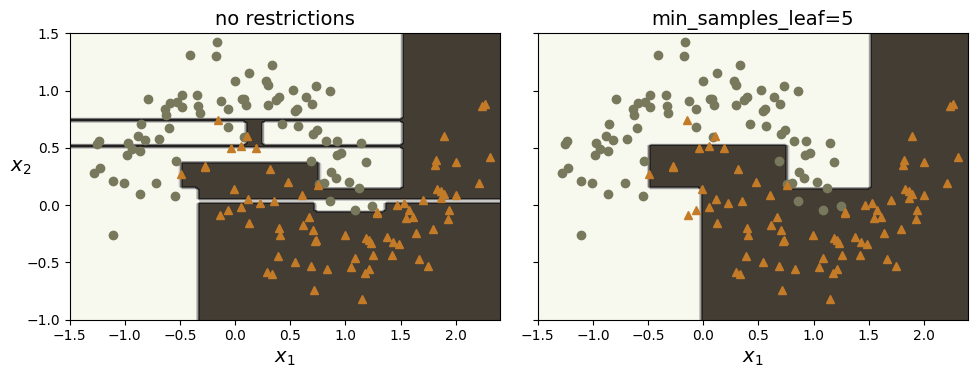

In [59]:
def plot_decision_boundary(clf, X,y, axes, cmap):

  x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100), np.linspace(axes[2], axes[3],100))
  print()
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred=clf.predict(X_new).reshape(x1.shape)

  #below two lines are for backgrond
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
  plt.contourf(x1, x2, y_pred, cmap="Greys", alpha=0.8)

  #below lines are to show data points.
  colors={"Wistia":["#78785c", "#c47b27"], "Pastel1":["red","blue"]}
  markers=("o","^")
  for idx in (0,1):
    plt.plot(X[:,0][y==idx], X[:,1][y == idx],
             color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig,axes= plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons, axes=[-1.5,2.4,-1,1.5], cmap="Wistia")
plt.title("no restrictions")

plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons, axes=[-1.5,2.4,-1,1.5], cmap="Wistia")
plt.title(f"min_samples_leaf={tree_clf2.min_samples_leaf}")
plt.ylabel("")
save_fig("min_samples_leaf_plot")
plt.show()

## Regression



In [60]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

X_quad= np.random.rand(200,1) - 0.5 # a single random input feature.
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200,1)

tree_reg= DecisionTreeRegressor(max_depth=2, random_state=42)

tree_reg.fit(X_quad,y_quad)


DecisionTreeRegressor(max_depth=2, random_state=42)

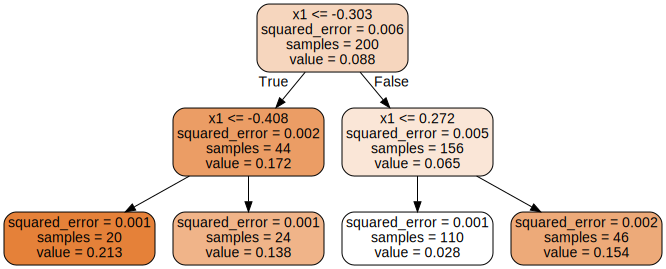

In [61]:
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH/"regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [62]:
tree_reg2= DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [63]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [64]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

In below plot it shows for `max_depth=3`, and it predicted value for each region is always the average target value of the instances in that region. The algorithm splits each region in a way that makes most training instances as close as possible to the predicted value.

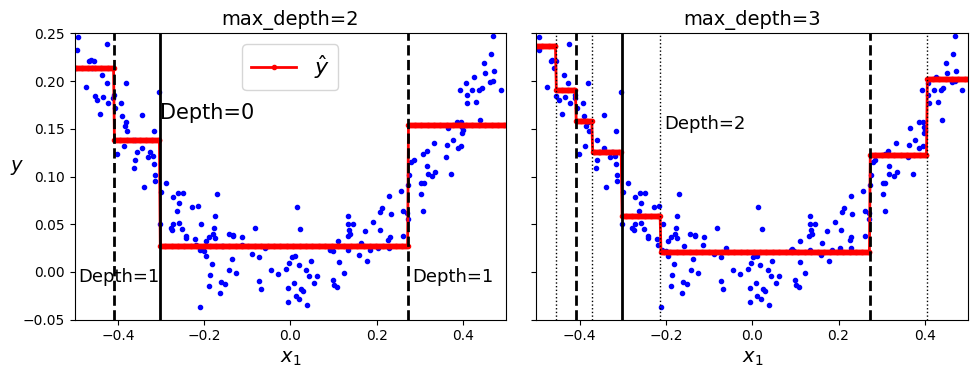

In [65]:
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
  x1= np.linspace(axes[0], axes[1], 500).reshape(-1,1)
  y_pred = tree_reg.predict(x1)
  plt.axis(axes)
  plt.xlabel("$x_1$")
  plt.plot(X,y, "b.")
  plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")


fig, axes= plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b =  tree_reg.tree_.threshold[[0,1,4]]

for split, style in ((th0, "k-"),(th1a, "k--"),(th1b, "k--")):
  plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)

plt.text(th0, 0.16, "Depth=0",fontsize=15)
plt.text(th1a +0.01, -0.01 ,"Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b+0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s=tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"),(th1b,"k--")):
  plt.plot([split,split],[-0.05,0.25], style, linewidth=2)

for split in th2s:
  plt.plot([split,split],[-0.05,0.25], "k:", linewidth=1)

plt.text(th2s[2]+ 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

save_fig("tree_regression_plot")
plt.show()


## CART cost function for regression

$J(k,t_k)= \dfrac{m_{left}}{m} MSE_{left} + \dfrac{m_{right}}{m} MSE_{right} \ \ , where \begin{matrix}MSE_{node}=\dfrac{\sum_{i  \mathbf{\epsilon} {node}}(\hat y_{node}-y^{(i)})^2}{m_{node}} \\
\hat y_{node}=\dfrac{\sum_{i \epsilon {node}}y^{(i)}}{m_{node}}
\end{matrix}$


Decision Trees are prone to overfitting when dealing with regression tasks, without regularization it can produce below left plot and it is perfect example of overfitting the training set.

Just using `min_sample_leaf=10` result in a much more reasonable model, shown in right.

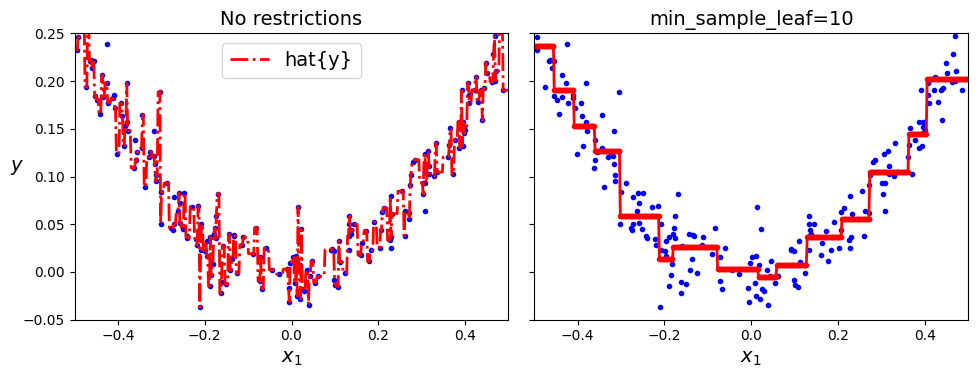

In [66]:
tree_reg1= DecisionTreeRegressor(random_state=42)
tree_reg2= DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1= np.linspace(-0.5,0.5, 500).reshape(-1,1)
y_pred1= tree_reg1.predict(x1)
y_pred2= tree_reg2.predict(x1)

fig, axes= plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1,"r-.", linewidth=2, label=r"hat{y}")
plt.axis([-0.5,0.5,-0.05,0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad,"b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5,0.5,-0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_sample_leaf={tree_reg2.min_samples_leaf}")
save_fig("tree_regression_regulariation_plot")
plt.show()


## Sensitivity to Axis Orientation

Limitation
* Decision Trees love orthogonal decision boundaries(all splits are perpendicular to an axis), and that make them sensitive to the data's orientation.

How to prevent this?
* One way to limit this problem is to scale the data, then apply *principal component analysis transformation*.
In this below example , rotate the data in a way that reduces the correlation between features, that often makes things easier for tree.

In below example the left plot is showing how easily Decision tree split data , however on the right plot , decision tree boundary looks unnecessarily convoluted after rotatiing data to $45^{°}$, it is very likely that the model on the right will not generalize well.

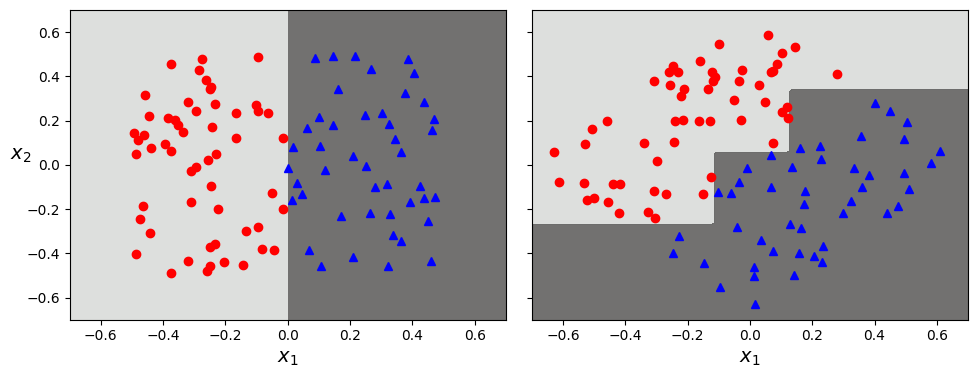

In [67]:
np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5

y_square = (X_square[:,0]>0)

angle=np.pi/4 # 45 degree

rotation_matrix= np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])

X_rotation_square =  X_square.dot(rotation_matrix)

tree_clf_square =  DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotation_square, y_square)

fig, axes= plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square,X_square, y_square, axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotation_square, y_square, axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")
save_fig("sensitivity_to_rotation_plot")
plt.show()

In below Example, creating a small pipeline that scales the data and rotates it using PCA, then train a `DecisionTreeClassifier` on the data.

In [68]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca=DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

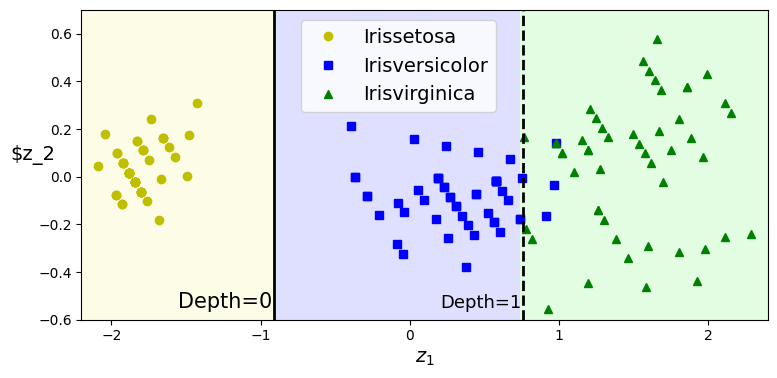

In [69]:
plt.figure(figsize=(8,4))

axes=[-2.2,2.4,-0.6,0.7]

z0s, z1s= np.meshgrid(np.linspace(axes[0], axes[1], 100), np.linspace(axes[2], axes[3],100))

X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]

y_pred= tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)

for idx,(name,style) in enumerate(zip(iris.target_names, ("yo","bs","g^"))):
  plt.plot(X_iris_rotated[:,0][y_iris==idx],
           X_iris_rotated[:,1][y_iris == idx],
           style, label=f"Iris{name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0,2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1- 0.01, axes[2] + 0.05, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(th2- 0.01, axes[2] + 0.05, "Depth=1", horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32,0.67))
save_fig("pca_preprocessing_plot")
plt.show()

## Decision Trees Have a High Variance

* The main issue with the decision trees is that they have quite a high variane:small changes to the hyperparameters or to the data may produce very different models.

* Training algorithm used by Scikit-Learn is stochastic- it randomly selects the set of features to evaluate at each node.

* It is possible the decision tree will produce different results on the exact same data. (If `random_state` is not set with same value.)

In [70]:
tree_clf_tweaked= DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=40)

In [71]:
tree_clf_tweaked.tree_.threshold[[0,2]]

array([0.80000001, 1.75      ])

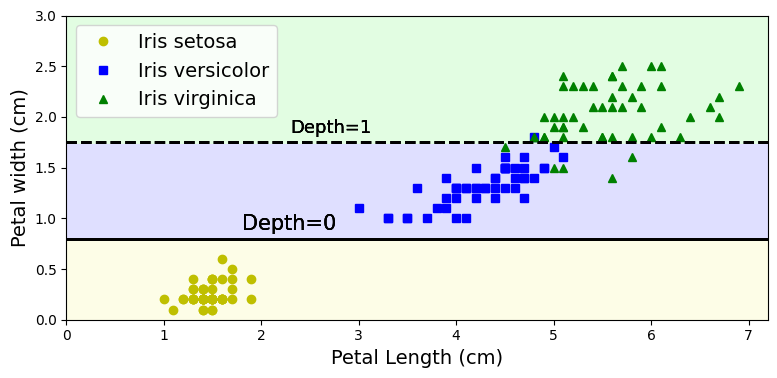

In [73]:
plt.figure(figsize=(8,4))
y_pred= tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names,("yo","bs","g^"))):
  #print(idx)
  #print(X_iris[:,1][y_iris == idx])
  plt.plot(X_iris[:,0][y_iris == idx], X_iris[:,1][y_iris == idx], style, label=f"Iris {name}")
  th0, th1= tree_clf_tweaked.tree_.threshold[[0,2]]
  plt.plot([0,7.2],[th0,th0], "k-", linewidth=2)
  plt.plot([0,7.2],[th1,th1], "k--", linewidth=2)
  plt.text(1.8, th0 + 0.05, "Depth=0",verticalalignment="bottom", fontsize=15)
  plt.text(2.3, th1 + 0.05, "Depth=1",verticalalignment="bottom", fontsize=13)
  plt.xlabel("Petal Length (cm)")
  plt.ylabel("Petal width (cm)")
  plt.axis([0,7.2, 0,3])
  plt.legend()
  save_fig("decision_tree_high_variance_plot")



## Accessing the Tree Structure

A trained `DecisionTreeClassifier` has a `tree_` attribute that stores the tree's structure:

In [74]:
tree= tree_clf.tree_
tree

 can get the total number of nodes in the tree:

In [75]:
tree.node_count

5

And other self-explanatory attributes are available

In [76]:
tree.max_depth

2

In [77]:
tree.max_n_classes

3

In [78]:
tree.n_features

2

In [79]:
tree.n_outputs

1

In [80]:
tree.n_leaves

3

All information about the nodes is stored in NumPy arrays, for example the imurity of each node:

In [81]:
tree.impurity

array([0.66666667, 0.        , 0.5       , 0.16803841, 0.04253308])

The root node is at index 0. The left and right children nodes of node $i$ are `tree.children_left[i]` and `tree.children_right[i]`.

The children of root node are: (this gives index posion of the node)

In [83]:
tree.children_left[0],tree.children_right[0]

(1, 2)

when the left and right nodes are equal, it means this is a leaf node (and the children node ids are arbitrary):

In [84]:
tree.children_left[3], tree.children_right[3]

(-1, -1)

to get leaf node ids

In [87]:
is_leaf=(tree.children_left== tree.children_right)
np.arange(tree.node_count)[is_leaf]

array([1, 3, 4])

Non-leaf nodes are called split nodes. The feature they split is available via `feature` array. Values for leaf nodes should be ignored:

In [88]:
tree.feature

array([ 0, -2,  1, -2, -2], dtype=int64)

and corresponding thresholds are:

In [89]:
tree.threshold

array([ 2.44999999, -2.        ,  1.75      , -2.        , -2.        ])

And the number of instances per class that reached each node is available too:

In [90]:
tree.value

array([[[50., 50., 50.]],

       [[50.,  0.,  0.]],

       [[ 0., 50., 50.]],

       [[ 0., 49.,  5.]],

       [[ 0.,  1., 45.]]])

In [91]:
tree.n_node_samples # sample at each node

array([150,  50, 100,  54,  46], dtype=int64)

In [93]:
tree.value.sum(axis=(1,2))

array([150.,  50., 100.,  54.,  46.])

In [92]:
np.all(tree.value.sum(axis=(1,2))== tree.n_node_samples) #np.all is a NumPy function that returns True if all elements of an array are true. It is often used to check if all conditions in an array are met.


True

Compute depth of each node:

In [100]:
stack=[(0,0)]
a,b=stack.pop()
a

0

In [103]:
def compute_depth(tree_clf):
  tree= tree_clf.tree_
  depth = np.zeros(tree.node_count)
  print("depth \n: ",depth)
  stack=[(0,0)]
  while stack:
    print(stack)
    node, node_depth=stack.pop() # this will take last element from array
    print("node, node_depth \n: ",node, node_depth)
    depth[node] = node_depth
    if tree.children_left[node] != tree.children_right[node]:
      stack.append((tree.children_left[node], node_depth + 1))
      stack.append((tree.children_right[node], node_depth + 1))
  return depth

depth=compute_depth(tree_clf)
depth

depth 
:  [0. 0. 0. 0. 0.]
[(0, 0)]
node, node_depth 
:  0 0
[(1, 1), (2, 1)]
node, node_depth 
:  2 1
[(1, 1), (3, 2), (4, 2)]
node, node_depth 
:  4 2
[(1, 1), (3, 2)]
node, node_depth 
:  3 2
[(1, 1)]
node, node_depth 
:  1 1


array([0., 1., 1., 2., 2.])

Get the thresholds of all split nodes at depth 1

In [105]:
tree_clf.tree_.feature[(depth==1) & (~is_leaf)]

array([1], dtype=int64)

In [107]:
tree_clf.tree_.threshold[(depth==1) & (~is_leaf)]

array([1.75])

## Question & Answer

1. What is the approximate depth of a decision tree trained (without restrictions) on a training set with one million instances?

- The depth of a well-balanced binary tree containing m leaves is equal to $log_2 (m)$, rounded up. $log_2$ is the binary log; $log_2(m)=log(m)/log(2)$. A binary Decision Tree (One that makes only binary decisions , as is the ase with all trees in Scikit-Learn) will end up more or less well balanced at the end of training, with one leaf per training instance if it is trained without restrictions, thus if training set coNtains one million instances, the Decision Tree will have a depth of $log_2(10^6) \approx 20$ (it will be bit more as the tree will not be perfectly balanced).

2. Is a node’s Gini impurity generally lower or higher than its parent’s? Is it generally lower/higher, or always lower/higher?

- A node's Gini impurity is generally lower than its parent's. This is due to the CART training algorithm's cost function, which split each node in a way that minimizes the weighted sum of its children's Gini impurities.However it is possible that child node has higher Gini impurity than parent's. Example: A node containing four instances of class A and one of class B. Its Gini impurity is $1-(\dfrac{1}{5})^2-(\dfrac{4}{5})^2=0.32$.

  Now suppose a dataset is one dimensional and the instances are lined up un the following order: A,B, A, A, A. Then the algorithm will split this node after the second instance, producing one child node with instances A,B, and the other child node with instances A, A , A. The first child node's Gini impurity is

  $1-(\dfrac{1}{2})^2-(\dfrac{1}{2})^2=0.5$

  Which is higher then its parent's. This is compensated for by the fact that the other node is pure, so its overall weighted Gini impurity is $\dfrac{2}{5} \times 0.5 + \dfrac{3}{5} \times 0= 0.2$ which is lower than the parent's Gini impurity.

3. If a decision tree is overfitting the training set, is it a good idea to try decreasing max_depth?

- Decreasing max_depth is good idea as it is kind of applying constraint to the model, regularizing it.

4. If a decision tree is underfitting the training set, is it a good idea to try scaling the input features?

- Decision Trees don't care weather or not the training data is scaled or centered; that is one of the nice things about Decision Trees. So scaling won't help if the model is underfitting.

5.  If it takes one hour to train a decision tree on a training set containing one million instances, roughly how much time will it take to train another decision tree on a training set containing ten million instances? Hint: consider the CART algorithm’s computational complexity.


- The computational complexity of training a Decision Tree is $O(n \times m \ log_2(m))$. If we multiple the training set size by 10, the training time will be multiplied by $K=\dfrac{(n \times 10 \ m \times log_2(10 m))}{(n \times m \times log_2(m))}= \dfrac{10 \times log_2(10m)}{log_2(m)}$.

  If $m=10^6$, then $K \approx 11.7$, so the training time will be 11.7 hrs approx..

  m is total number of instances , and multiply with 10 for 10 millions record, 10m is also 10 X 1 million

6. If it takes one hour to train a decision tree on a given training set, roughly how much time will it take if you double the number of features?

- If the number of features double, the training time will also roughly double.

7. Train and fine-tune a decision tree for the moons dataset by following these steps:

  Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.

  Use train_test_split() to split the dataset into a training set and a test set.

  Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.

  Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

In [108]:
from sklearn.datasets import make_moons

X_moons, y_moons= make_moons(n_samples=10000, noise=0.4, random_state=42)



Split training and test set

In [109]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test= train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

Useing GridSearch with cross-validation (with the help of `GridSearchCV` class) to find good hyperparameter values for a `DecisionTreeClassifier`

will try various values for `max_leaf_nodes`.

In [111]:
from sklearn.model_selection import GridSearchCV

params={
    'max_leaf_nodes': list(range(2,100)),
    'max_depth':list(range(1,7)),
    'min_samples_split':[2,3,4]
}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3)

grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [112]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

Train it on the full training set using above hyperparameters, and measure model's performance on the test set.

by default, `GridSearchCV` trains the best model found on the whole training set (can change this by using `refit=False`), so we don't need to do this again, we can simply evaluate the model.

In [113]:
from sklearn.metrics import accuracy_score

y_pred=grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8595

8. Grow a forest by following these steps:

  Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn’s ShuffleSplit class for this.

  Train one decision tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 decision trees on the test set. Since they were trained on smaller sets, these decision trees will likely perform worse than the first decision tree, achieving only about 80% accuracy.

  Now comes the magic. For each test set instance, generate the predictions of the 1,000 decision trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This approach gives you majority-vote predictions over the test set.

  Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a random forest classifier!

a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's `ShuffleSplit` class for this.

In [115]:
from sklearn.model_selection import ShuffleSplit

n_trees=1000
n_instances=100

mini_sets= []

rs= ShuffleSplit(n_splits=n_trees, test_size=len(X_train)- n_instances, random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
  X_mini_train = X_train[mini_train_index]
  y_mini_train = y_train[mini_train_index]
  mini_sets.append((X_mini_train,y_mini_train))

b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [116]:
from sklearn.base import clone

forest=[clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores=[]

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
  tree.fit(X_mini_train, y_mini_train)

  y_pred=tree.predict(X_test)
  accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8056605

c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's `mode()` function for this). This gives you _majority-vote predictions_ over the test set.

In [120]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
  Y_pred[tree_index]= tree.predict(X_test)

In [121]:
from scipy.stats import mode

y_pred_majority_votes, n_votes= mode(Y_pred, axis=0)

d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher)

In [122]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.873